In [72]:
#importing basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

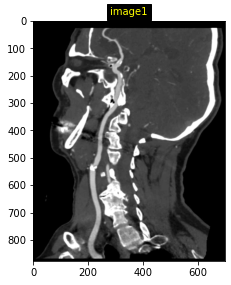

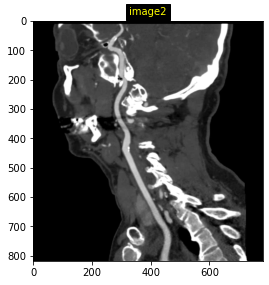

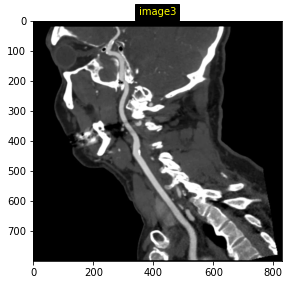

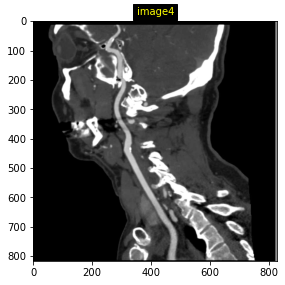

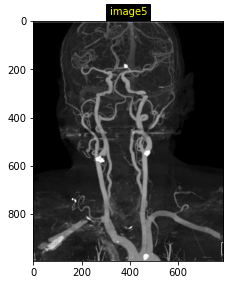

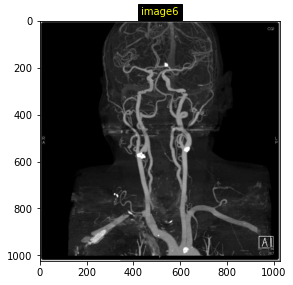

In [73]:
#reading my images,The images are Neuro images

%matplotlib inline
I1=cv2.imread("1.JPG",0)
I2=cv2.imread("2.JPG",0)
I3=cv2.imread("3.JPG",0)
I4=cv2.imread("4.JPG",0)
I5=cv2.imread("5.JPG",0)
I6=cv2.imread("6.JPG",0)
Images=[I1,I2,I3,I4,I5,I6]
name=["image1","image2","image3","image4","image5","image6"]
for i in range(len(Images)):
    plt.figure(figsize=(30,15))
    plt.subplot(3,2,i+1)
    plt.imshow(Images[i],cmap="gray")
    plt.title(name[i],backgroundcolor='black', color='yellow',fontsize=10)
    plt.show()

In [74]:
# for the purpose fo the net coeffficient , depending upon the feature we want to highlifhgt, we can choose anyone from the 
#mean, maximum, or the minimum
def Net_coeff(coef1,coef2,coef3,coef4,coef5,coef6,method):
    if(method=="mean"):
        net_coef=(coef1+coef2+coef3+coef4+coef5+coef6)/6
    if(method=="min"):
        net_coef=min(coef1,coef2,coef3,coef4,coef5,coef6)
    if(method=="max"):
        net_coef=max(coef1,coef2,coef3,coef4,coef5,coef6)
    return net_coef

In [75]:
#for the image fusion it is very much important that,the sizes of the images should be equal tso that they can compare the 
#point intensity and that will be usefull in collecting the feature information
def Reshaping(A,B,C,D,E,F):
    B=cv2.resize(A,A.shape)
    C=cv2.resize(C,A.shape)
    D=cv2.resize(D,A.shape)
    E=cv2.resize(E,A.shape)
    F=cv2.resize(F,A.shape)
    A=cv2.resize(A,A.shape)
    
    return A,B,C,D,E,F

In [76]:
#oto calculate the wavelet transform coefficient
def Coef(A,B,C,D,E,F,wavelete_transform):
    coef1=pywt.dwt2(A,wavelete_transform)
    coef2=pywt.dwt2(B,wavelete_transform)
    coef3=pywt.dwt2(C,wavelete_transform)
    coef4=pywt.dwt2(D,wavelete_transform)
    coef5=pywt.dwt2(E,wavelete_transform)
    coef6=pywt.dwt2(F,wavelete_transform)
    return coef1,coef2,coef3,coef4,coef5,coef6

In [77]:
I1,I2,I3,I4,I5,I6=Reshaping(I1,I2,I3,I4,I5,I6)

In [78]:
#getting the coefficient
coef1,coef2,coef3,coef4,coef5,coef6=Coef(I1,I2,I3,I4,I5,I6,"haar")
coeficients=[coef1,coef2,coef3,coef4,coef5,coef6]

In [79]:
#solution for the "MEAN"/ we can use minimum, maximum:   
fused_weights=[]
method="mean"
for i in range(len(coef1)-1):
    if (i==0):    #approximate coeff calculation
        fused_weights.append(Net_coeff(coef1[0],coef2[0],coef3[0],coef4[0],coef5[0],coef6[0],method))
    else:
        C1=Net_coeff(coef1[i][0],coef2[i][0],coef3[i][0],coef4[i][0],coef5[i][0],coef6[i][0],method)
        C2=Net_coeff(coef1[i][1],coef2[i][1],coef3[i][1],coef4[i][1],coef5[i][1],coef6[i][1],method)
        C3=Net_coeff(coef1[i][2],coef2[i][2],coef3[i][2],coef4[i][2],coef5[i][2],coef6[i][2],method)
        fused_weights.append((C1,C2,C3))

In [80]:
#reconstructing images from the coefficient
reconstructed_image=pywt.waverec2(fused_weights,'haar')

In [81]:
reconstructed_image = np.multiply(np.divide(reconstructed_image - np.min(reconstructed_image),(np.max(reconstructed_image) - np.min(reconstructed_image))),255)
reconstructed_image = reconstructed_image.astype(np.uint8)

Text(0.5, 1.0, 'RECONSTRUCTED IMAGE OF MORE INFORMATION')

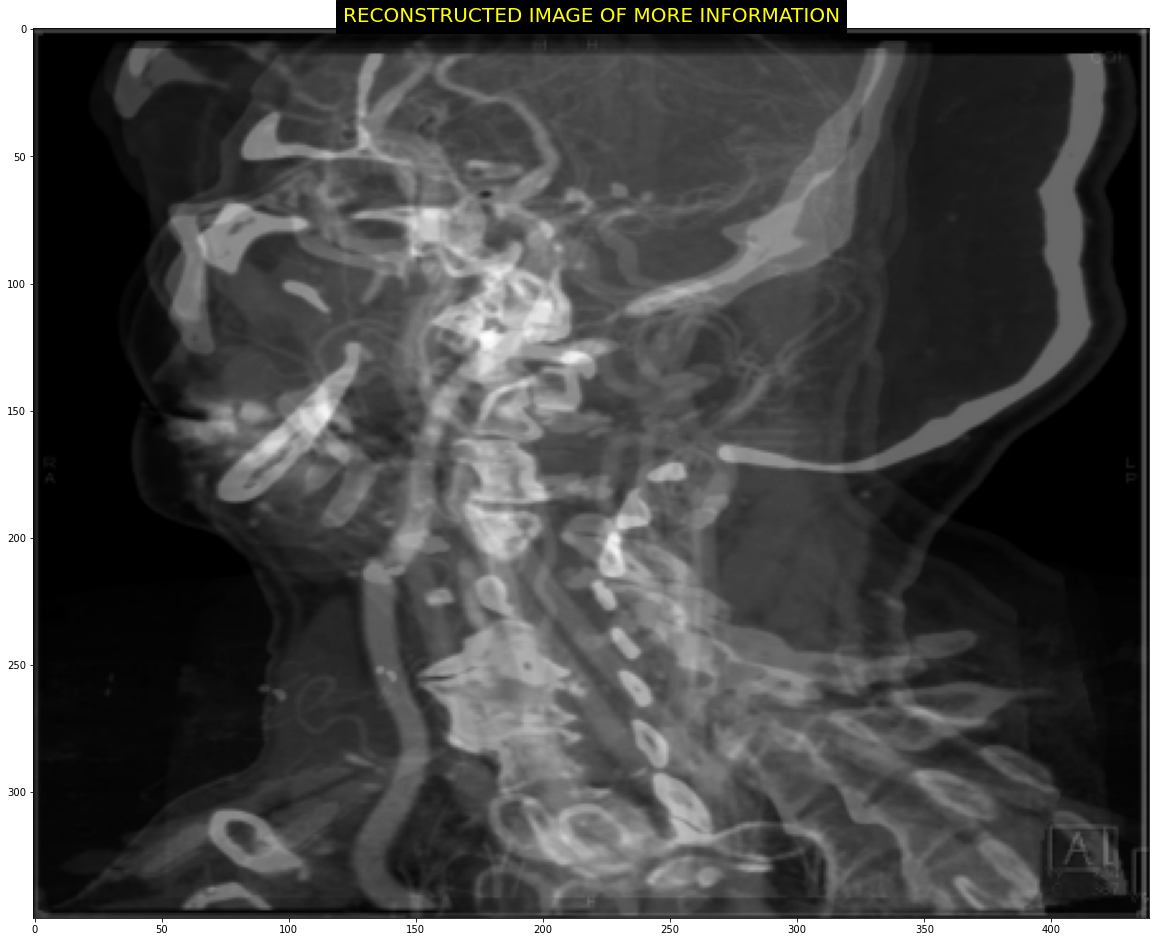

In [82]:
#plotting the output
plt.imsave("reconstructed_image.jpg",reconstructed_image)
plt.figure(figsize=(20,20))
plt.imshow(reconstructed_image,cmap="gray")
plt.title("RECONSTRUCTED IMAGE OF MORE INFORMATION",backgroundcolor='black', color='yellow',fontsize=20)

### checking with db5

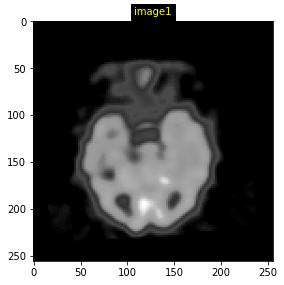

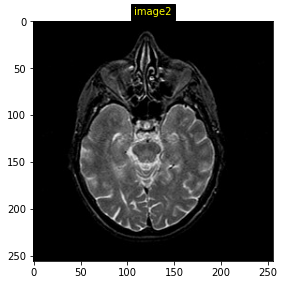

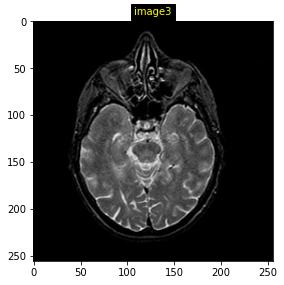

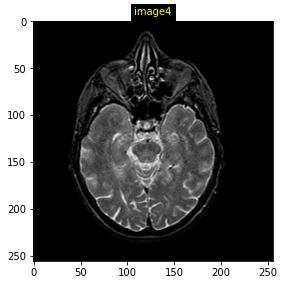

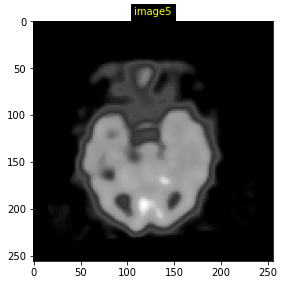

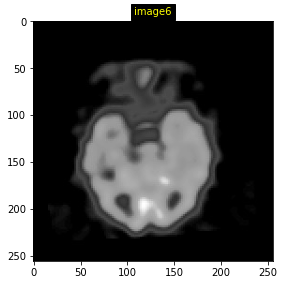

In [83]:
#CHECKING SAME CODE WITH ATLAS DATASET


#importing basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

#reading my images,The images are Neuro images

%matplotlib inline
I1=cv2.imread("B1.JPG",0)
I2=cv2.imread("B2.JPG",0)
I3=cv2.imread("B2.JPG",0)
I4=cv2.imread("B2.JPG",0)
I5=cv2.imread("B1.JPG",0)
I6=cv2.imread("B1.JPG",0)
Images=[I1,I2,I3,I4,I5,I6]
name=["image1","image2","image3","image4","image5","image6"]
for i in range(len(Images)):
    plt.figure(figsize=(30,15))
    plt.subplot(3,2,i+1)
    plt.imshow(Images[i],cmap="gray")
    plt.title(name[i],backgroundcolor='black', color='yellow',fontsize=10)
    plt.show()

Text(0.5, 1.0, 'RECONSTRUCTED IMAGE OF MORE INFORMATION')

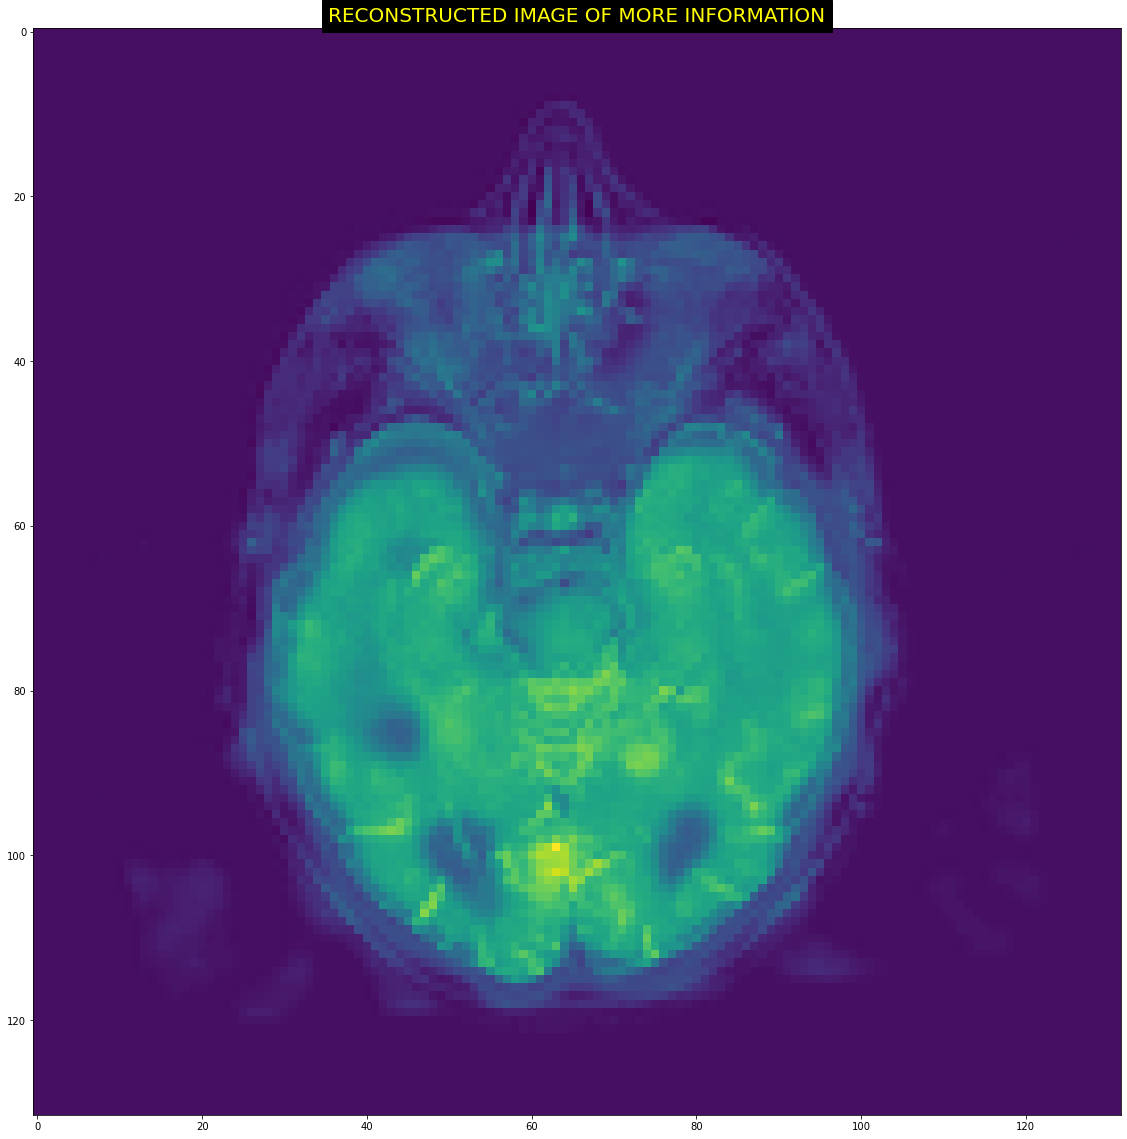

In [84]:
# for the purpose fo the net coeffficient , depending upon the feature we want to highlifhgt, we can choose anyone from the 
#mean, maximum, or the minimum
def Net_coeff(coef1,coef2,coef3,coef4,coef5,coef6,method):
    if(method=="mean"):
        net_coef=(coef1+coef2+coef3+coef4+coef5+coef6)/6
    if(method=="min"):
        net_coef=min(coef1,coef2,coef3,coef4,coef5,coef6)
    if(method=="max"):
        net_coef=max(coef1,coef2,coef3,coef4,coef5,coef6)
    return net_coef
#for the image fusion it is very much important that,the sizes of the images should be equal tso that they can compare the 
#point intensity and that will be usefull in collecting the feature information
def Reshaping(A,B,C,D,E,F):
    B=cv2.resize(A,A.shape)
    C=cv2.resize(C,A.shape)
    D=cv2.resize(D,A.shape)
    E=cv2.resize(E,A.shape)
    F=cv2.resize(F,A.shape)
    A=cv2.resize(A,A.shape)
    
    return A,B,C,D,E,F
#oto calculate the wavelet transform coefficient
def Coef(A,B,C,D,E,F,wavelete_transform):
    coef1=pywt.dwt2(A,wavelete_transform)
    coef2=pywt.dwt2(B,wavelete_transform)
    coef3=pywt.dwt2(C,wavelete_transform)
    coef4=pywt.dwt2(D,wavelete_transform)
    coef5=pywt.dwt2(E,wavelete_transform)
    coef6=pywt.dwt2(F,wavelete_transform)
    return coef1,coef2,coef3,coef4,coef5,coef6
I1,I2,I3,I4,I5,I6=Reshaping(I1,I2,I3,I4,I5,I6)
#getting the coefficient
coef1,coef2,coef3,coef4,coef5,coef6=Coef(I1,I2,I3,I4,I5,I6,"db5")
coeficients=[coef1,coef2,coef3,coef4,coef5,coef6]
#solution for the "MEAN"/ we can use minimum, maximum:   
fused_weights=[]
method="mean"
for i in range(len(coef1)-1):
    if (i==0):    #approximate coeff calculation
        fused_weights.append(Net_coeff(coef1[0],coef2[0],coef3[0],coef4[0],coef5[0],coef6[0],method))
    else:
        C1=Net_coeff(coef1[i][0],coef2[i][0],coef3[i][0],coef4[i][0],coef5[i][0],coef6[i][0],method)
        C2=Net_coeff(coef1[i][1],coef2[i][1],coef3[i][1],coef4[i][1],coef5[i][1],coef6[i][1],method)
        C3=Net_coeff(coef1[i][2],coef2[i][2],coef3[i][2],coef4[i][2],coef5[i][2],coef6[i][2],method)
        fused_weights.append((C1,C2,C3))
#reconstructing images from the coefficient
reconstructed_image=pywt.waverec2(fused_weights,'db5')
reconstructed_image = np.multiply(np.divide(reconstructed_image - np.min(reconstructed_image),(np.max(reconstructed_image) - np.min(reconstructed_image))),255)
reconstructed_image = reconstructed_image.astype(np.uint8)
#plotting the output
plt.imsave("reconstructed.jpg",reconstructed_image)
plt.figure(figsize=(20,20))
plt.imshow(reconstructed_image)
plt.title("RECONSTRUCTED IMAGE OF MORE INFORMATION",backgroundcolor='black', color='yellow',fontsize=20)